In [ ]:
"""Introduction to Regression

Regression is a statistical technique used to model the relationship between a dependent variable 
(in this case, the car price) and one or more independent variables (such as mileage, horsepower 
(HP), age, and type of transmission). It is a key tool in data analysis, enabling the prediction 
of future values based on patterns identified
in historical data."""

In [ ]:
"""In this project, we will explore different models ranging from simpler to more complex ones. 
I will demonstrate which model is more effective, along with their advantages and disadvantages 
depending on their use and the problem at hand. This will allow us to visually and practically 
observe how each model behaves and which one can be more easily adapted to our questions."""

In [ ]:
""" 1 ) Simple Linear Regression: Price vs. Mileage"""

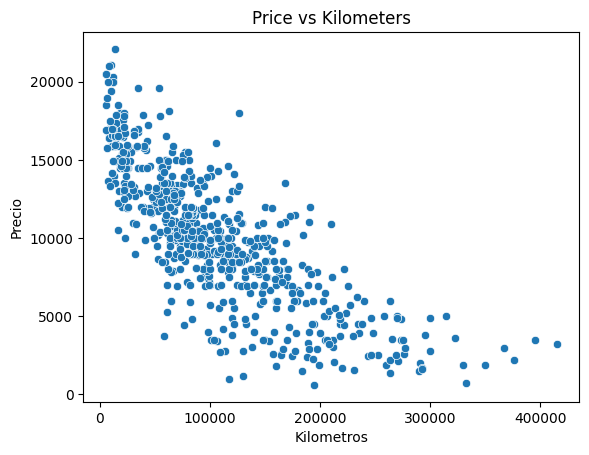

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split

# Absolute path to the CSV file
file_path = '/Users/kardiahq/Desktop/34.projects_portfolio/34.1_auto2/auto2/202412_CochesLimpio (2).csv'

# Load the data
df = pd.read_csv(file_path, sep=";")

# Filter for Ibiza model in Spain
df_ibiza = df[(df['Modelo'] == 'ibiza') & (df['Pais'] == 'E')]

# Remove cars with less than 1000 km
df_ibiza = df_ibiza[df_ibiza['Kilometros'] > 1000]

# Scatter plot: price vs kilometers
sns.scatterplot(x='Kilometros', y='Precio', data=df_ibiza)
plt.title('Price vs Kilometers')
plt.show()

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Define the dependent and independent variables
X1 = df_ibiza[['Kilometros']]
y = df_ibiza['Precio']

# Add a constant to the independent variable
X1 = sm.add_constant(X1)

# Fit the linear regression model
model1 = sm.OLS(y, X1).fit()

# Predictions
y_pred1 = model1.predict(X1)

# Calculate errors
mse1 = mean_squared_error(y, y_pred1)
errors1 = y - y_pred1

# Display the results
print(f'Mean Squared Error (MSE): {mse1:.2f}')
print(model1.summary())

Mean Squared Error (MSE): 7056147.54
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1089.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          2.87e-140
Time:                        13:32:40   Log-Likelihood:                -5972.9
No. Observations:                 642   AIC:                         1.195e+04
Df Residuals:                     640   BIC:                         1.196e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.5

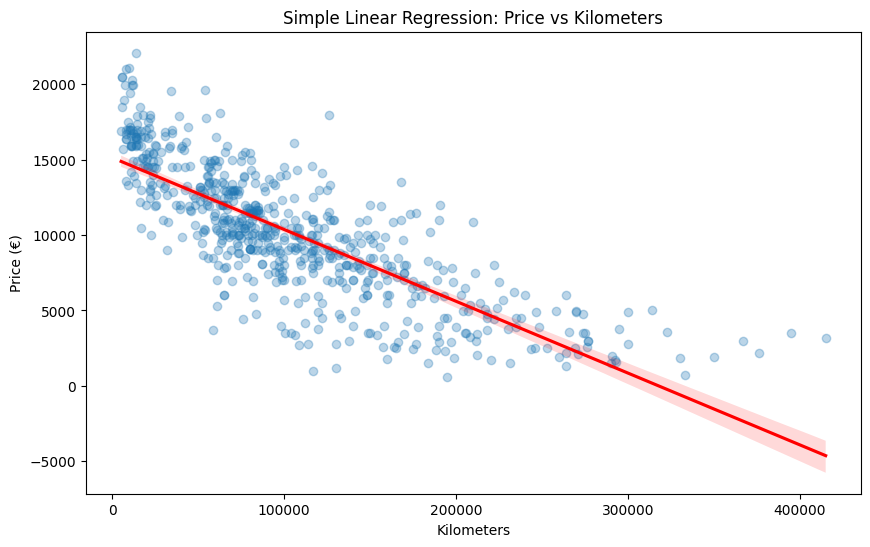

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x=df_ibiza['Kilometros'], y=df_ibiza['Precio'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Kilometers")
plt.ylabel("Price (€)")
plt.title("Simple Linear Regression: Price vs Kilometers")
plt.show()

Regression formula: Price = 15139.79 + -0.05 * Kilometers
R^2 coefficient: 0.6299
P-value statistic: 0.0000


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_20827/3098790727.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f'Price = {model1.params[0]:.2f} + {model1.params[1]:.2f} * Kilometers'


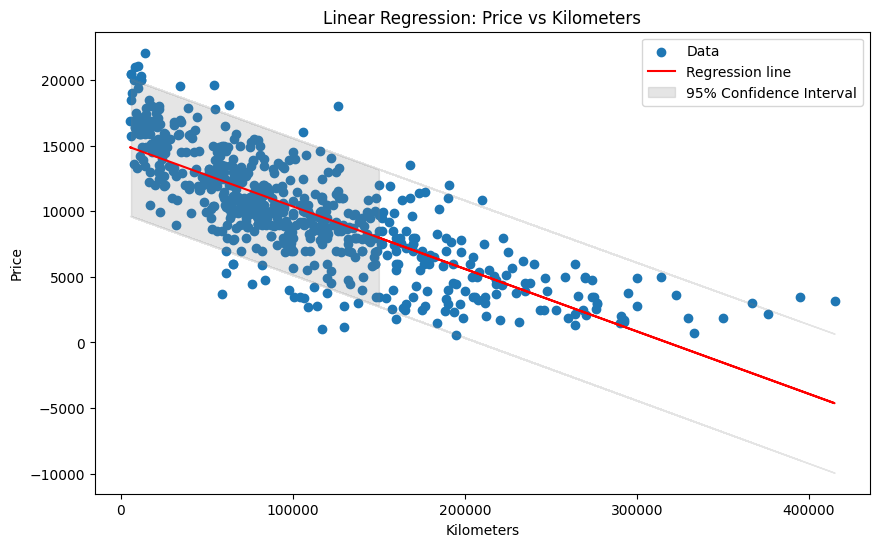

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Define the dependent and independent variables
X1 = df_ibiza['Kilometros']
y = df_ibiza['Precio']

# Add a constant to the independent variable
X1 = sm.add_constant(X1)

# Fit the linear regression model
model1 = sm.OLS(y, X1).fit()

# Get the results
formula = f'Price = {model1.params[0]:.2f} + {model1.params[1]:.2f} * Kilometers'
r_squared = model1.rsquared
p_value = model1.f_pvalue

# Display the results
print(f'Regression formula: {formula}')
print(f'R^2 coefficient: {r_squared:.4f}')
print(f'P-value statistic: {p_value:.4f}')

# Predictions and confidence intervals
predictions = model1.get_prediction(X1)
pred_summary = predictions.summary_frame(alpha=0.05)

# Scatterplot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_ibiza['Kilometros'], df_ibiza['Precio'], label='Data')
plt.plot(df_ibiza['Kilometros'], model1.fittedvalues, color='red', label='Regression line')
plt.fill_between(df_ibiza['Kilometros'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Kilometers')
plt.legend()
plt.show()

In [ ]:
""" 2) Multiple Regression: Price , Mileage and Age : 
Adding one more variable, such as age, will allow us to see if including this variable 
can help improve our model.

"""

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Create the Age variable
today = pd.to_datetime('2025-03-21')
df_ibiza['Fabrication'] = pd.to_datetime(df_ibiza['Fabricacion'])
df_ibiza['Age'] = (today - df_ibiza['Fabrication']).dt.days / 365.25

# Define the dependent and independent variables
X2 = df_ibiza[['Kilometros', 'Age']]
y = df_ibiza['Precio']

# Add a constant to the independent variables
X2 = sm.add_constant(X2)

# Fit the linear regression model
model2 = sm.OLS(y, X2).fit()

# Get the results
formula = f'Price = {model2.params[0]:.2f} + {model2.params[1]:.2f} * Kilometers + {model2.params[2]:.2f} * Age'
r_squared = model2.rsquared
p_value = model2.f_pvalue

# Display the results
print(f'Regression formula: {formula}')
print(f'R^2 coefficient: {r_squared:.4f}')
print(f'P-value statistic: {p_value:.4f}')

Regression formula: Price = 16254.45 + -0.02 * Kilometers + -442.63 * Age
R^2 coefficient: 0.8163
P-value statistic: 0.0000


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_20827/1402592002.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f'Price = {model2.params[0]:.2f} + {model2.params[1]:.2f} * Kilometers + {model2.params[2]:.2f} * Age'


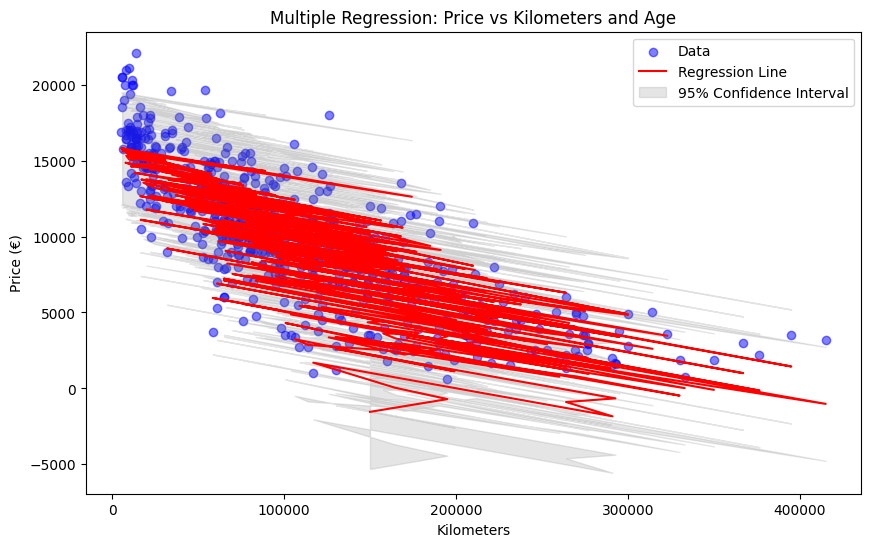

In [15]:
# Scatterplot and regression line for multiple regression
plt.figure(figsize=(10, 6))
plt.scatter(df_ibiza['Kilometros'], df_ibiza['Precio'], label='Data', alpha=0.5, color='blue')
plt.plot(df_ibiza['Kilometros'], model2.fittedvalues, color='red', label='Regression Line')
plt.fill_between(df_ibiza['Kilometros'], 
                 model2.get_prediction(X2).summary_frame(alpha=0.05)['obs_ci_lower'], 
                 model2.get_prediction(X2).summary_frame(alpha=0.05)['obs_ci_upper'], 
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Kilometers')
plt.ylabel('Price (€)')
plt.title('Multiple Regression: Price vs Kilometers and Age')
plt.legend()
plt.show()

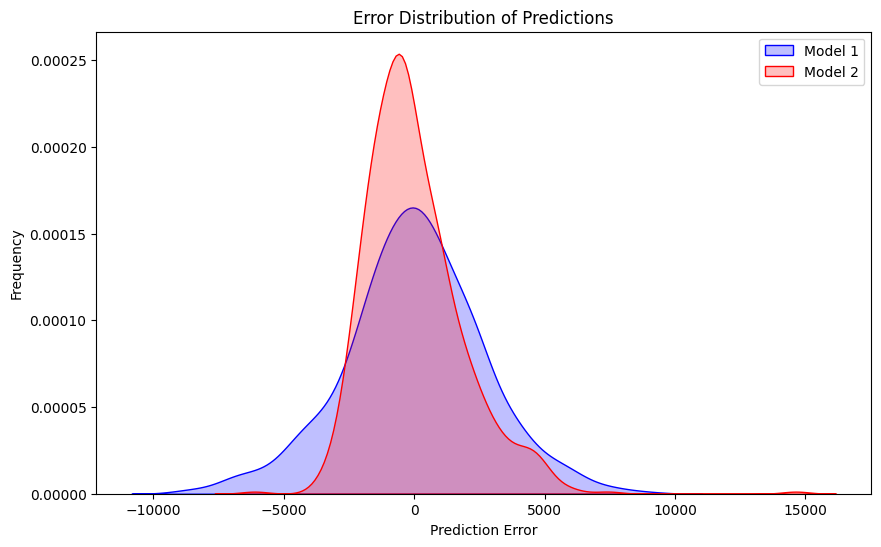

In [16]:
# Calculate prediction errors for model 1
y1_pred = model1.predict(X1)
error1 = y - y1_pred

# Calculate prediction errors for model 2
y2_pred = model2.predict(X2)
error2 = y - y2_pred

# Probability distribution function of errors for model 1 and model 2
plt.figure(figsize=(10, 6))
sns.kdeplot(error1, color='blue', label='Model 1', fill=True)
sns.kdeplot(error2, color='red', label='Model 2', fill=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution of Predictions')
plt.legend()
plt.show()

In [ ]:
"""If the R² of Model 2 is significantly higher than that of Model 1, we can conclude that including 
Age improves the model's ability to explain the price.
If the p-value for Age in Model 2 is significant, this indicates that the car's age has an important 
impact on price, in addition to mileage.
If the prediction errors (error distribution) are smaller in Model 2, this suggests that Model 2 is 
more accurate.

In summary, Model 2 should be preferred if:

            -It has a higher R².

            -The p-values of the variables are significant.

            -Prediction errors are smaller and better distributed."""

In [ ]:
""" 3) Multiple Regression: Price , Mileage , Age , Transmission: 
       Adding one more variable, such as age, will allow us to see if including this variable 
       can help improve our model.
"""

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Create the Age variable
today = pd.to_datetime('2025-03-21')
df_ibiza['Fabrication'] = pd.to_datetime(df_ibiza['Fabricacion'])
df_ibiza['Age'] = (today - df_ibiza['Fabrication']).dt.days / 365.25

# Transform the Automatic/Manual variable to 0 and 1
df_ibiza['Automatic'] = df_ibiza['Automatico/Manual'].apply(lambda x: 1 if x == 'Automatico' else 0)

# Define the dependent and independent variables
X3 = df_ibiza[['Kilometros', 'Age', 'CV', 'Automatic']]
y = df_ibiza['Precio']

# Add a constant to the independent variables
X3 = sm.add_constant(X3)

# Fit the linear regression model
model3 = sm.OLS(y, X3).fit()

# Get the results
formula = f'Price = {model3.params[0]:.2f} + {model3.params[1]:.2f} * Kilometers + {model3.params[2]:.2f} * Age + {model3.params[3]:.2f} * CV + {model3.params[4]:.2f} * Automatic'
r_squared = model3.rsquared
p_value = model3.f_pvalue

# Display the results
print(f'Regression formula: {formula}')
print(f'R^2 coefficient: {r_squared:.4f}')
print(f'P-value statistic: {p_value:.4f}')

Regression formula: Price = 10470.52 + -0.02 * Kilometers + -379.65 * Age + 53.04 * CV + 1317.31 * Automatic
R^2 coefficient: 0.8970
P-value statistic: 0.0000


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_20827/1088668575.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f'Price = {model3.params[0]:.2f} + {model3.params[1]:.2f} * Kilometers + {model3.params[2]:.2f} * Age + {model3.params[3]:.2f} * CV + {model3.params[4]:.2f} * Automatic'


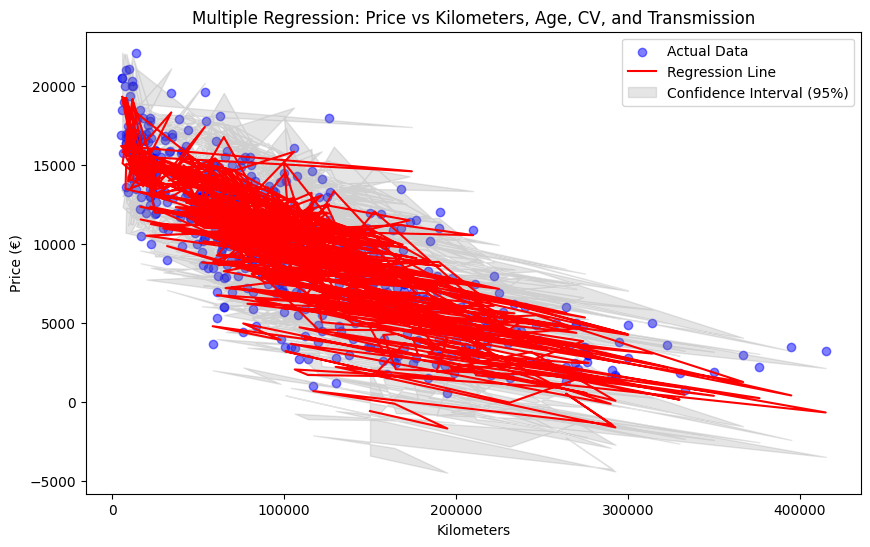

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions and confidence interval summary
predictions = model3.get_prediction(X3)
pred_summary = predictions.summary_frame(alpha=0.05)

# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_ibiza['Kilometros'], y, label='Actual Data', alpha=0.5, color='blue')
plt.plot(df_ibiza['Kilometros'], model3.fittedvalues, color='red', label='Regression Line')
plt.fill_between(df_ibiza['Kilometros'], 
                 pred_summary['obs_ci_lower'], 
                 pred_summary['obs_ci_upper'], 
                 color='gray', alpha=0.2, label='Confidence Interval (95%)')

# Labels and title
plt.xlabel('Kilometers')
plt.ylabel('Price (€)')
plt.title('Multiple Regression: Price vs Kilometers, Age, CV, and Transmission')
plt.legend()
plt.show()


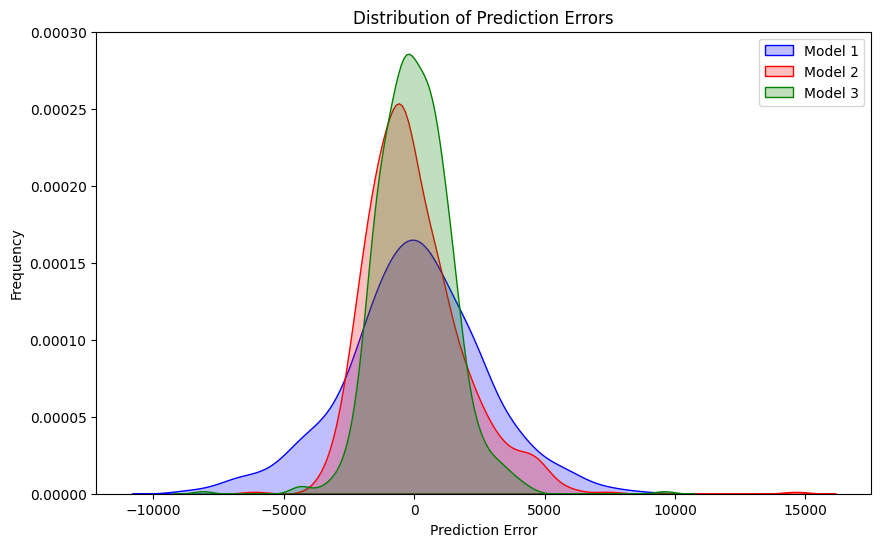

In [19]:
# Calculate prediction errors for Model 1
y1_pred = model1.predict(X1)
error1 = y - y1_pred

# Calculate prediction errors for Model 2
y2_pred = model2.predict(X2)
error2 = y - y2_pred

# Calculate prediction errors for Model 3
y3_pred = model3.predict(X3)
error3 = y - y3_pred

# Probability distribution function of prediction errors for Model 1, Model 2, and Model 3
plt.figure(figsize=(10, 6))
sns.kdeplot(error1, color='blue', label='Model 1', fill=True)
sns.kdeplot(error2, color='red', label='Model 2', fill=True)
sns.kdeplot(error3, color='green', label='Model 3', fill=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()


In [ ]:
"""4) Polynomial Regression: Price , Mileage , Age , Transmission:"""

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the Age variable
today = pd.to_datetime('2025-03-21')
df_ibiza['Fabrication'] = pd.to_datetime(df_ibiza['Fabricacion'])
df_ibiza['Age'] = (today - df_ibiza['Fabrication']).dt.days / 365.25

# Transform the Automatic/Manual variable to 0 and 1
df_ibiza['Automatic'] = df_ibiza['Automatico/Manual'].apply(lambda x: 1 if x == 'Automatico' else 0)

# Transform the Fuel variable to 0 and 1
df_ibiza['Fuel'] = df_ibiza['Combustible'].apply(lambda x: 1 if x == 'Gasolina' else 0)

# Define the dependent and independent variables
X4 = df_ibiza[['Kilometros', 'Age', 'CV', 'Automatic', 'Fuel']]
y = df_ibiza['Precio']

# Add a constant to the independent variables
X4 = sm.add_constant(X4)

# Fit the linear regression model
model4 = sm.OLS(y, X4).fit()

# Get the results
formula = f'Price = {model4.params[0]:.2f} + {model4.params[1]:.2f} * Kilometers + {model4.params[2]:.2f} * Age + {model4.params[3]:.2f} * CV + {model4.params[4]:.2f} * Automatic + {model4.params[5]:.2f} * Fuel'
r_squared = model4.rsquared
p_value = model4.f_pvalue

# Display the results
print(f'Regression formula: {formula}')
print(f'R^2 coefficient: {r_squared:.4f}')
print(f'P-value statistic: {p_value:.4f}')

Regression formula: Price = 10711.72 + -0.02 * Kilometers + -380.49 * Age + 52.95 * CV + 1349.36 * Automatic + -212.96 * Fuel
R^2 coefficient: 0.8973
P-value statistic: 0.0000


/var/folders/0p/7n5ngc6d6r7flqnyyr2rm3vh0000gn/T/ipykernel_20827/2839000312.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  formula = f'Price = {model4.params[0]:.2f} + {model4.params[1]:.2f} * Kilometers + {model4.params[2]:.2f} * Age + {model4.params[3]:.2f} * CV + {model4.params[4]:.2f} * Automatic + {model4.params[5]:.2f} * Fuel'


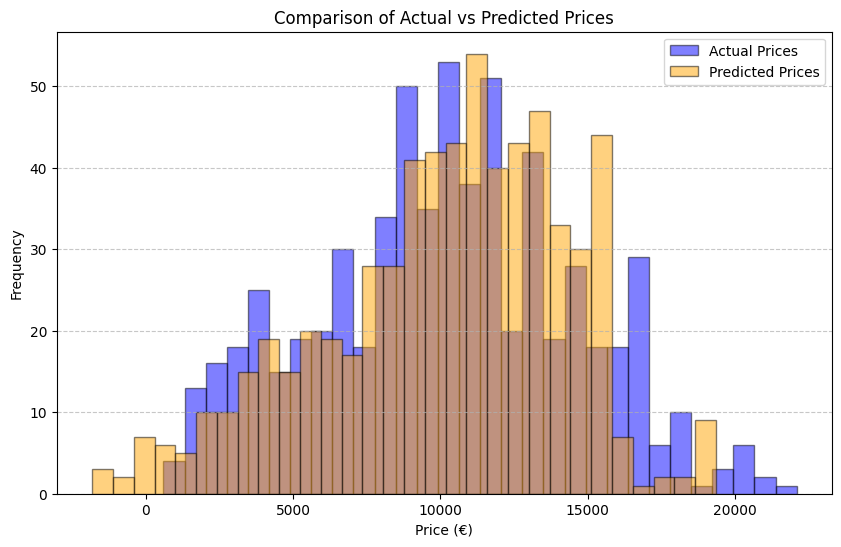

In [30]:
import matplotlib.pyplot as plt

# Model predictions
y_pred = model4.predict(X4)

# Create a combined histogram
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.5, label='Actual Prices', color='blue', edgecolor='black')  # Histogram for actual prices
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Prices', color='orange', edgecolor='black')  # Histogram for predicted prices

# Labels and title
plt.xlabel('Price (€)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Comparison of Actual vs Predicted Prices')  # Title of the plot
plt.legend()  # Add legend to differentiate the two datasets
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability of the frequency
plt.show()

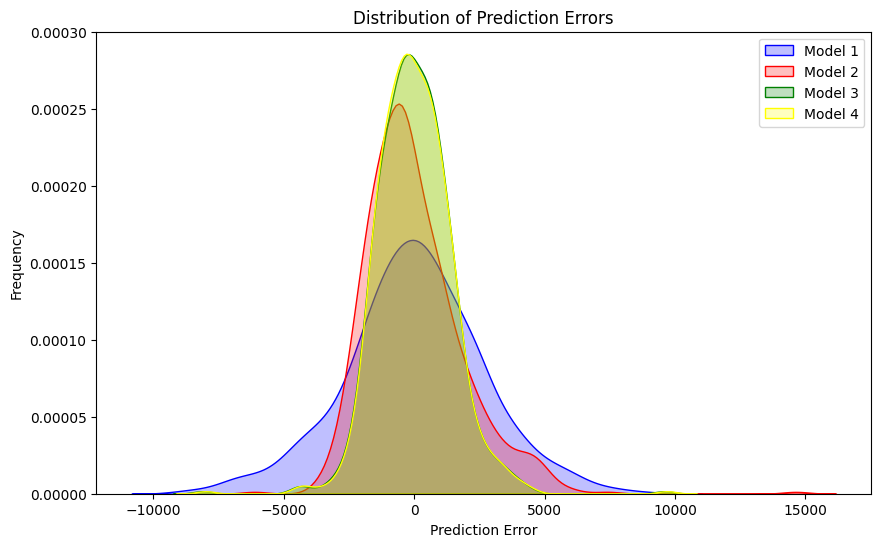

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the data
file_path = '/Users/kardiahq/Desktop/34.projects_portfolio/34.1_auto2/auto2/202412_CochesLimpio (2).csv'
df = pd.read_csv(file_path, sep=";")  # Load the dataset from the specified file path

# Filter for Ibiza model in Spain
df_ibiza = df[(df['Modelo'] == 'ibiza') & (df['Pais'] == 'E')]  # Select only rows with the 'ibiza' model in Spain

# Remove cars with less than 1000 km
df_ibiza = df_ibiza[df_ibiza['Kilometros'] > 1000]  # Exclude cars with mileage below 1000 km

# Define variables for Model 1 (Simple Linear Regression)
X1 = df_ibiza[['Kilometros']]  # Use only 'Kilometros' as the independent variable
y = df_ibiza['Precio']  # Dependent variable is 'Precio'
X1 = sm.add_constant(X1)  # Add a constant for the intercept
modelo1 = sm.OLS(y, X1).fit()  # Fit a simple linear regression model

# Define variables for Model 2 (Multiple Regression: Kilometers and Age)
today = pd.to_datetime('2025-03-21')  # Define the reference date
df_ibiza['Fabricacion'] = pd.to_datetime(df_ibiza['Fabricacion'])  # Convert 'Fabricacion' to datetime
df_ibiza['Age'] = (today - df_ibiza['Fabricacion']).dt.days / 365.25  # Calculate the car's age in years
X2 = df_ibiza[['Kilometros', 'Age']]  # Include 'Kilometros' and 'Age' as predictors
X2 = sm.add_constant(X2)  # Add a constant for the intercept
modelo2 = sm.OLS(y, X2).fit()  # Fit a multiple regression model

# Define variables for Model 3 (Multiple Regression: Kilometers, Age, CV, and Transmission)
df_ibiza['Automatic'] = df_ibiza['Automatico/Manual'].apply(lambda x: 1 if x == 'Automatico' else 0)  # Encode transmission type
X3 = df_ibiza[['Kilometros', 'Age', 'CV', 'Automatic']]  # Include additional variables
X3 = sm.add_constant(X3)  # Add a constant for the intercept
modelo3 = sm.OLS(y, X3).fit()  # Fit the regression model

# Define variables for Model 4 (Multiple Regression: Kilometers, Age, CV, Transmission, and Fuel)
df_ibiza['Fuel'] = df_ibiza['Combustible'].apply(lambda x: 1 if x == 'Gasolina' else 0)  # Encode fuel type
X4 = df_ibiza[['Kilometros', 'Age', 'CV', 'Automatic', 'Fuel']]  # Add fuel type as an additional predictor
X4 = sm.add_constant(X4)  # Add a constant for the intercept
modelo4 = sm.OLS(y, X4).fit()  # Fit the regression model

# Calculate prediction errors for each model
y1_pred = modelo1.predict(X1)  # Predictions for Model 1
error1 = y - y1_pred  # Errors for Model 1

y2_pred = modelo2.predict(X2)  # Predictions for Model 2
error2 = y - y2_pred  # Errors for Model 2

y3_pred = modelo3.predict(X3)  # Predictions for Model 3
error3 = y - y3_pred  # Errors for Model 3

y4_pred = modelo4.predict(X4)  # Predictions for Model 4
error4 = y - y4_pred  # Errors for Model 4

# Plot the distribution of prediction errors
plt.figure(figsize=(10, 6))
sns.kdeplot(error1, color='blue', label='Model 1', fill=True)  # Distribution of errors for Model 1
sns.kdeplot(error2, color='red', label='Model 2', fill=True)  # Distribution of errors for Model 2
sns.kdeplot(error3, color='green', label='Model 3', fill=True)  # Distribution of errors for Model 3
sns.kdeplot(error4, color='yellow', label='Model 4', fill=True)  # Distribution of errors for Model 4
plt.xlabel('Prediction Error')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of Prediction Errors')  # Plot title
plt.legend()  # Add a legend to identify models
plt.show()  # Display the plot


R^2 coefficient for the simple linear model: 0.7653
R^2 coefficient for the polynomial model: 0.7993


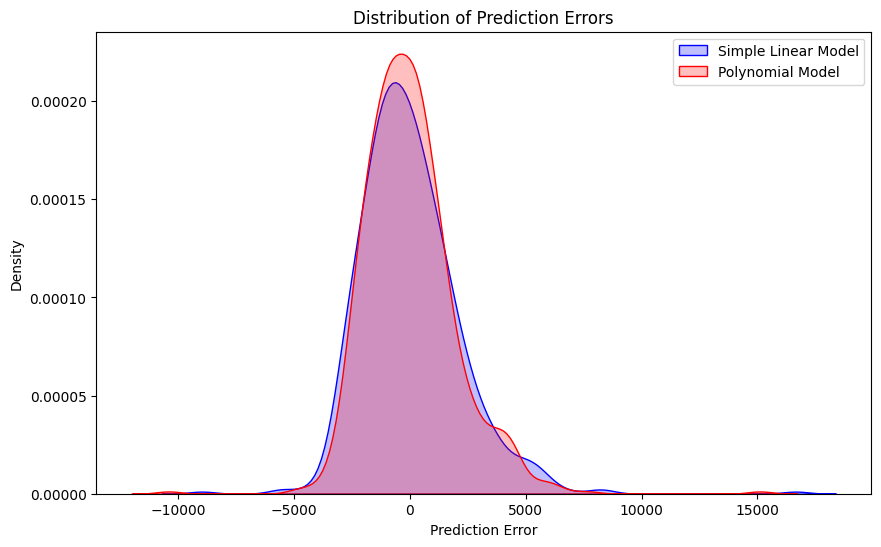

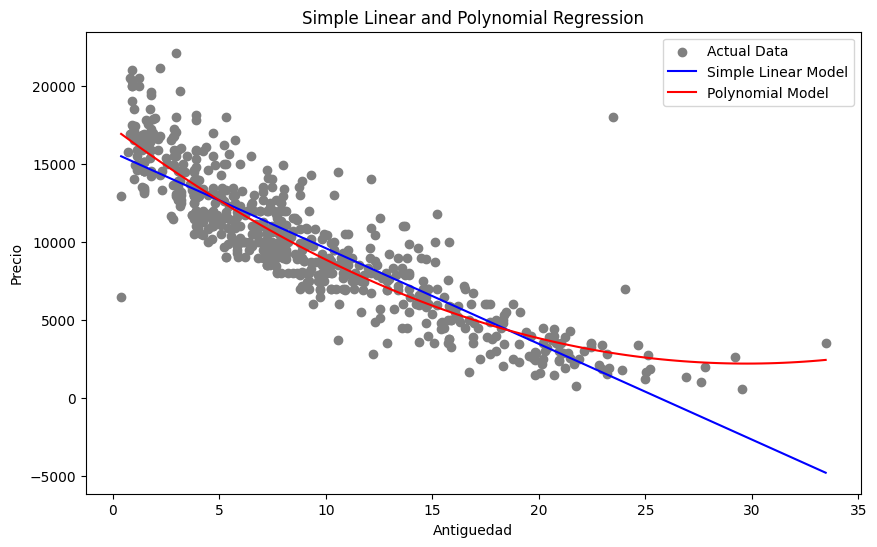

In [32]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Absolute path to the CSV file
file_path = '/Users/kardiahq/Desktop/34.projects_portfolio/34.1_auto2/auto2/202412_CochesLimpio (2).csv'

# Load the data
df = pd.read_csv(file_path, sep=";")  # Load the dataset from the specified file path

# Filter for Ibiza model in Spain
df_ibiza = df[(df['Modelo'] == 'ibiza') & (df['Pais'] == 'E')]  # Select only rows with the 'ibiza' model in Spain

# Remove cars with less than 1000 km
df_ibiza = df_ibiza[df_ibiza['Kilometros'] > 1000]  # Exclude cars with mileage below 1000 km

# Create the 'Antigüedad' (age) variable
today = pd.to_datetime('2025-03-21')  # Define the reference date
df_ibiza['Fabricacion'] = pd.to_datetime(df_ibiza['Fabricacion'])  # Convert 'Fabricacion' to datetime format
df_ibiza['Antiguedad'] = (today - df_ibiza['Fabricacion']).dt.days / 365.25  # Calculate the car's age in years

# Define dependent and independent variables for the simple linear model
X_simple = df_ibiza[['Antiguedad']]  # Use 'Antiguedad' as the independent variable
y = df_ibiza['Precio']  # Dependent variable is 'Precio'

# Add a constant to the independent variables
X_simple = sm.add_constant(X_simple)  # Add a constant term for the intercept

# Fit the simple linear regression model
simple_model = sm.OLS(y, X_simple).fit()  # Fit the model using ordinary least squares (OLS)

# Define dependent and independent variables for the polynomial model
df_ibiza['Antiguedad^2'] = df_ibiza['Antiguedad'] ** 2  # Add the squared term of 'Antiguedad'
X_poly = df_ibiza[['Antiguedad', 'Antiguedad^2']]  # Use 'Antiguedad' and 'Antiguedad^2' as predictors

# Add a constant to the independent variables
X_poly = sm.add_constant(X_poly)  # Add a constant term for the intercept

# Fit the polynomial regression model
poly_model = sm.OLS(y, X_poly).fit()  # Fit the polynomial regression model using OLS

# Obtain the R-squared values for both models
r_squared_simple = simple_model.rsquared  # R-squared for the simple linear model
r_squared_poly = poly_model.rsquared  # R-squared for the polynomial model

# Display the results
print(f'R^2 coefficient for the simple linear model: {r_squared_simple:.4f}')
print(f'R^2 coefficient for the polynomial model: {r_squared_poly:.4f}')

# Calculate prediction errors for the simple linear model
y_simple_pred = simple_model.predict(X_simple)  # Predictions for the simple linear model
error_simple = y - y_simple_pred  # Errors for the simple linear model

# Calculate prediction errors for the polynomial model
y_poly_pred = poly_model.predict(X_poly)  # Predictions for the polynomial model
error_poly = y - y_poly_pred  # Errors for the polynomial model

# Plot the probability distribution of prediction errors
plt.figure(figsize=(10, 6))
sns.kdeplot(error_simple, color='blue', label='Simple Linear Model', fill=True)  # Distribution of errors for simple model
sns.kdeplot(error_poly, color='red', label='Polynomial Model', fill=True)  # Distribution of errors for polynomial model
plt.xlabel('Prediction Error')  # X-axis label
plt.ylabel('Density')  # Y-axis label
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.legend()  # Add a legend to identify the models
plt.show()  # Display the plot

# Scatter plot with actual values and the two calculated regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df_ibiza['Antiguedad'], df_ibiza['Precio'], label='Actual Data', color='gray')  # Actual data points

# Generate values of 'Antiguedad' for the regression lines
antiguedad_vals = np.linspace(df_ibiza['Antiguedad'].min(), df_ibiza['Antiguedad'].max(), 100)

# Predictions for the simple linear model
X_simple_vals = sm.add_constant(pd.DataFrame({'Antiguedad': antiguedad_vals}))  # Create values for prediction
y_simple_vals = simple_model.predict(X_simple_vals)  # Predictions for simple model
plt.plot(antiguedad_vals, y_simple_vals, label='Simple Linear Model', color='blue')  # Plot the simple regression line

# Predictions for the polynomial model
X_poly_vals = sm.add_constant(pd.DataFrame({'Antiguedad': antiguedad_vals, 'Antiguedad^2': antiguedad_vals**2}))  # Create values for prediction
y_poly_vals = poly_model.predict(X_poly_vals)  # Predictions for polynomial model
plt.plot(antiguedad_vals, y_poly_vals, label='Polynomial Model', color='red')  # Plot the polynomial regression line

plt.xlabel('Antiguedad')  # X-axis label
plt.ylabel('Precio')  # Y-axis label
plt.title('Simple Linear and Polynomial Regression')  # Title of the plot
plt.legend()  # Add a legend to distinguish the models
plt.show()  # Display the plot


In [ ]:
"""Model Comparison

-R² as a Key Metric: More complex models (multiple regression) have a significantly higher R², indicating that they 
better explain the variability in the price.

-Error Distribution: More complex models also show a narrower and more centered error distribution, suggesting 
greater accuracy in predictions.

-Simplicity vs. Complexity: While simple models are easier to interpret, multiple and polynomial models are more
effective in capturing the complexity of the data."""

In [ ]:
"""Final Conclusions:

- Importance of Variables: Car prices are influenced by multiple factors, and a model that considers only one variable
(such as mileage or age) is insufficient to capture the market's complexity.

- Multiple Models as the Best Option: Multiple regression models are the most suitable for predicting prices as they 
integrate various vehicle characteristics that affect their value.

- Nonlinear Relationships: Including polynomial terms (like Age²) improves the model's fit by capturing nonlinear 
relationships, such as the accelerated depreciation of older vehicles.

- Practical Applications: The final model can be used to estimate car prices based on their features, making it a 
valuable tool for dealerships, buyers, and sellers in the used car market.

- Limitations: While the models explain much of the variability, external factors (such as market conditions or 
economic events) remain that cannot be fully captured.

- In summary, the analysis demonstrates that multiple regression models, combined with polynomial terms when necessary, 
are powerful tools for predicting car prices. However, it is crucial to validate these models with additional data and 
consider external factors to further improve their accuracy."""